## Supervised Learning & Unsupervised Learning

### Titanic data exercise
#### In this part, we took a dataset about poeple on the Titanic.

### Finance data exercise
#### In this part, we took a dataset about different poeple's investissement strategie

In [107]:
# Upload dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [108]:
titanic_data = pd.read_csv('./Data/titanic.csv')

## Select colomn we want to keep
titanic_col_to_keep = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
df_titanic = titanic_data[titanic_col_to_keep].copy()

In [109]:
# Data cleaning
missing_values = df_titanic.isnull().sum()
print("Missing values in each columns :")
print(missing_values)

Missing values in each columns :
Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
dtype: int64


In [110]:
## Replace missing value
df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic['Age'].median())

## Convert the non-numerical column
le = LabelEncoder()
df_titanic['Sex'] = le.fit_transform(df_titanic['Sex'])

In [111]:
## Apply normalisation
## Now we apply the StandardScaler
scaler = StandardScaler()

df_titanic_input = df_titanic.drop(['Survived'], axis=1)
df_titanic_output = df_titanic['Survived']

df_titanic_input_normalized = scaler.fit_transform(df_titanic_input)

## Construction of the final Dataset
dataframe_titanic_input_normalized = pd.DataFrame(df_titanic_input_normalized, columns=df_titanic_input.columns)
df_titanic_final = pd.concat([dataframe_titanic_input_normalized, df_titanic_output.reset_index(drop=True)], axis=1)

## This task will be a classification supervised learning. 
## The goal is to train the model to recognize if someone suervived or not

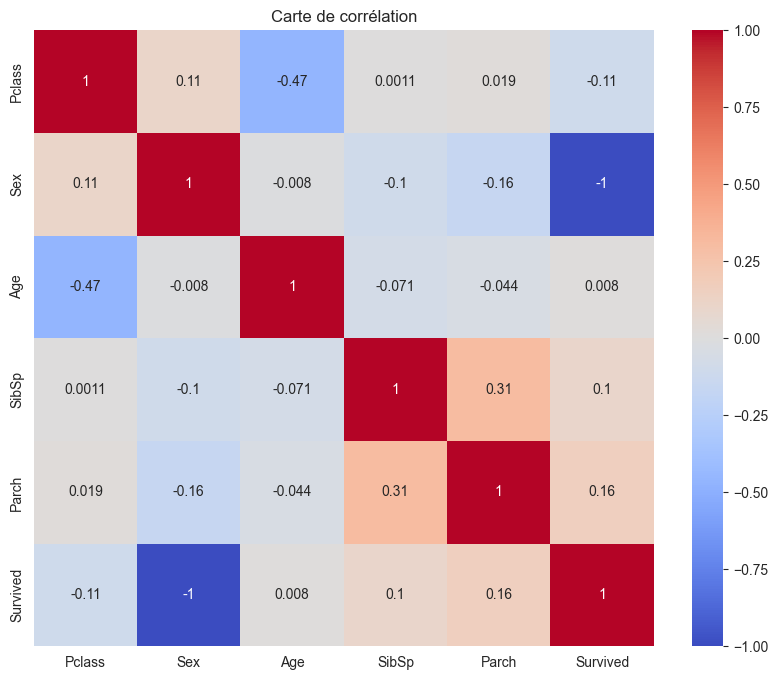

In [112]:
# Data visualisation
## correlation variable has all the relation between my columns
plt.figure(figsize=(10, 8))
correlation = df_titanic_final.corr()

## visualize this variable
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Carte de corrélation")
plt.show()

In [113]:
# Machine learning model
X = df_titanic_final.drop('Survived', axis=1)
y = df_titanic_final['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 0 1 0 1]


In [114]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print("MSE : ", mse)

r2 = r2_score(y_test, y_pred)
print("R2 : ", r2)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

print("Classification Report :\n", classification_report(y_test, y_pred))

MSE :  0.0
R2 :  1.0
Accuracy : 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

